In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Importação do accuracy_score

# Importando a base de dados
df = pd.read_csv('dados_produtos.csv')

In [148]:
df.info() # exibe as informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [149]:
print(df.describe())

           rating  rating_count  purchased
count  100.000000    100.000000     100.00
mean     4.056900   2536.670000       0.55
std      0.588344   1458.312544       0.50
min      3.020000     10.000000       0.00
25%      3.580000   1433.250000       0.00
50%      4.105000   2424.000000       1.00
75%      4.505000   3773.000000       1.00
max      5.000000   4977.000000       1.00


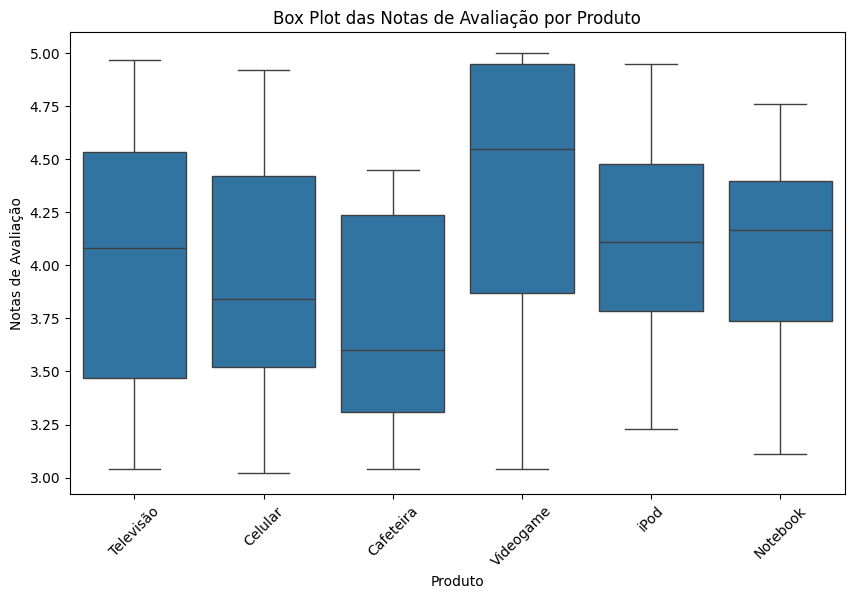

In [150]:
# Boxplot separado por produtos
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_name', y='rating', data=df)
plt.title('Box Plot das Notas de Avaliação por Produto')
plt.xlabel('Produto')
plt.ylabel('Notas de Avaliação')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor legibilidade
plt.show()

In [165]:
# 2. Definindo variáveis de entrada (X) e saída (y)
X = df[['rating']]  # Usando a coluna de avaliação como entrada
y = df['purchased']  # A variável alvo (se o produto foi comprado)

In [166]:
# 3. Dividir os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
# 4. Criar e treinar o modelo de árvore de decisão
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [168]:
# 5. Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

In [169]:
# 6. Calcular e exibir a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia}")

# 7. Exibir relatório de classificação com mais métricas
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.6

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.47      0.64        15

    accuracy                           0.60        20
   macro avg       0.69      0.73      0.60        20
weighted avg       0.85      0.60      0.62        20



In [170]:
# 8. Exibir a matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Matriz de Confusão:
[[5 0]
 [8 7]]


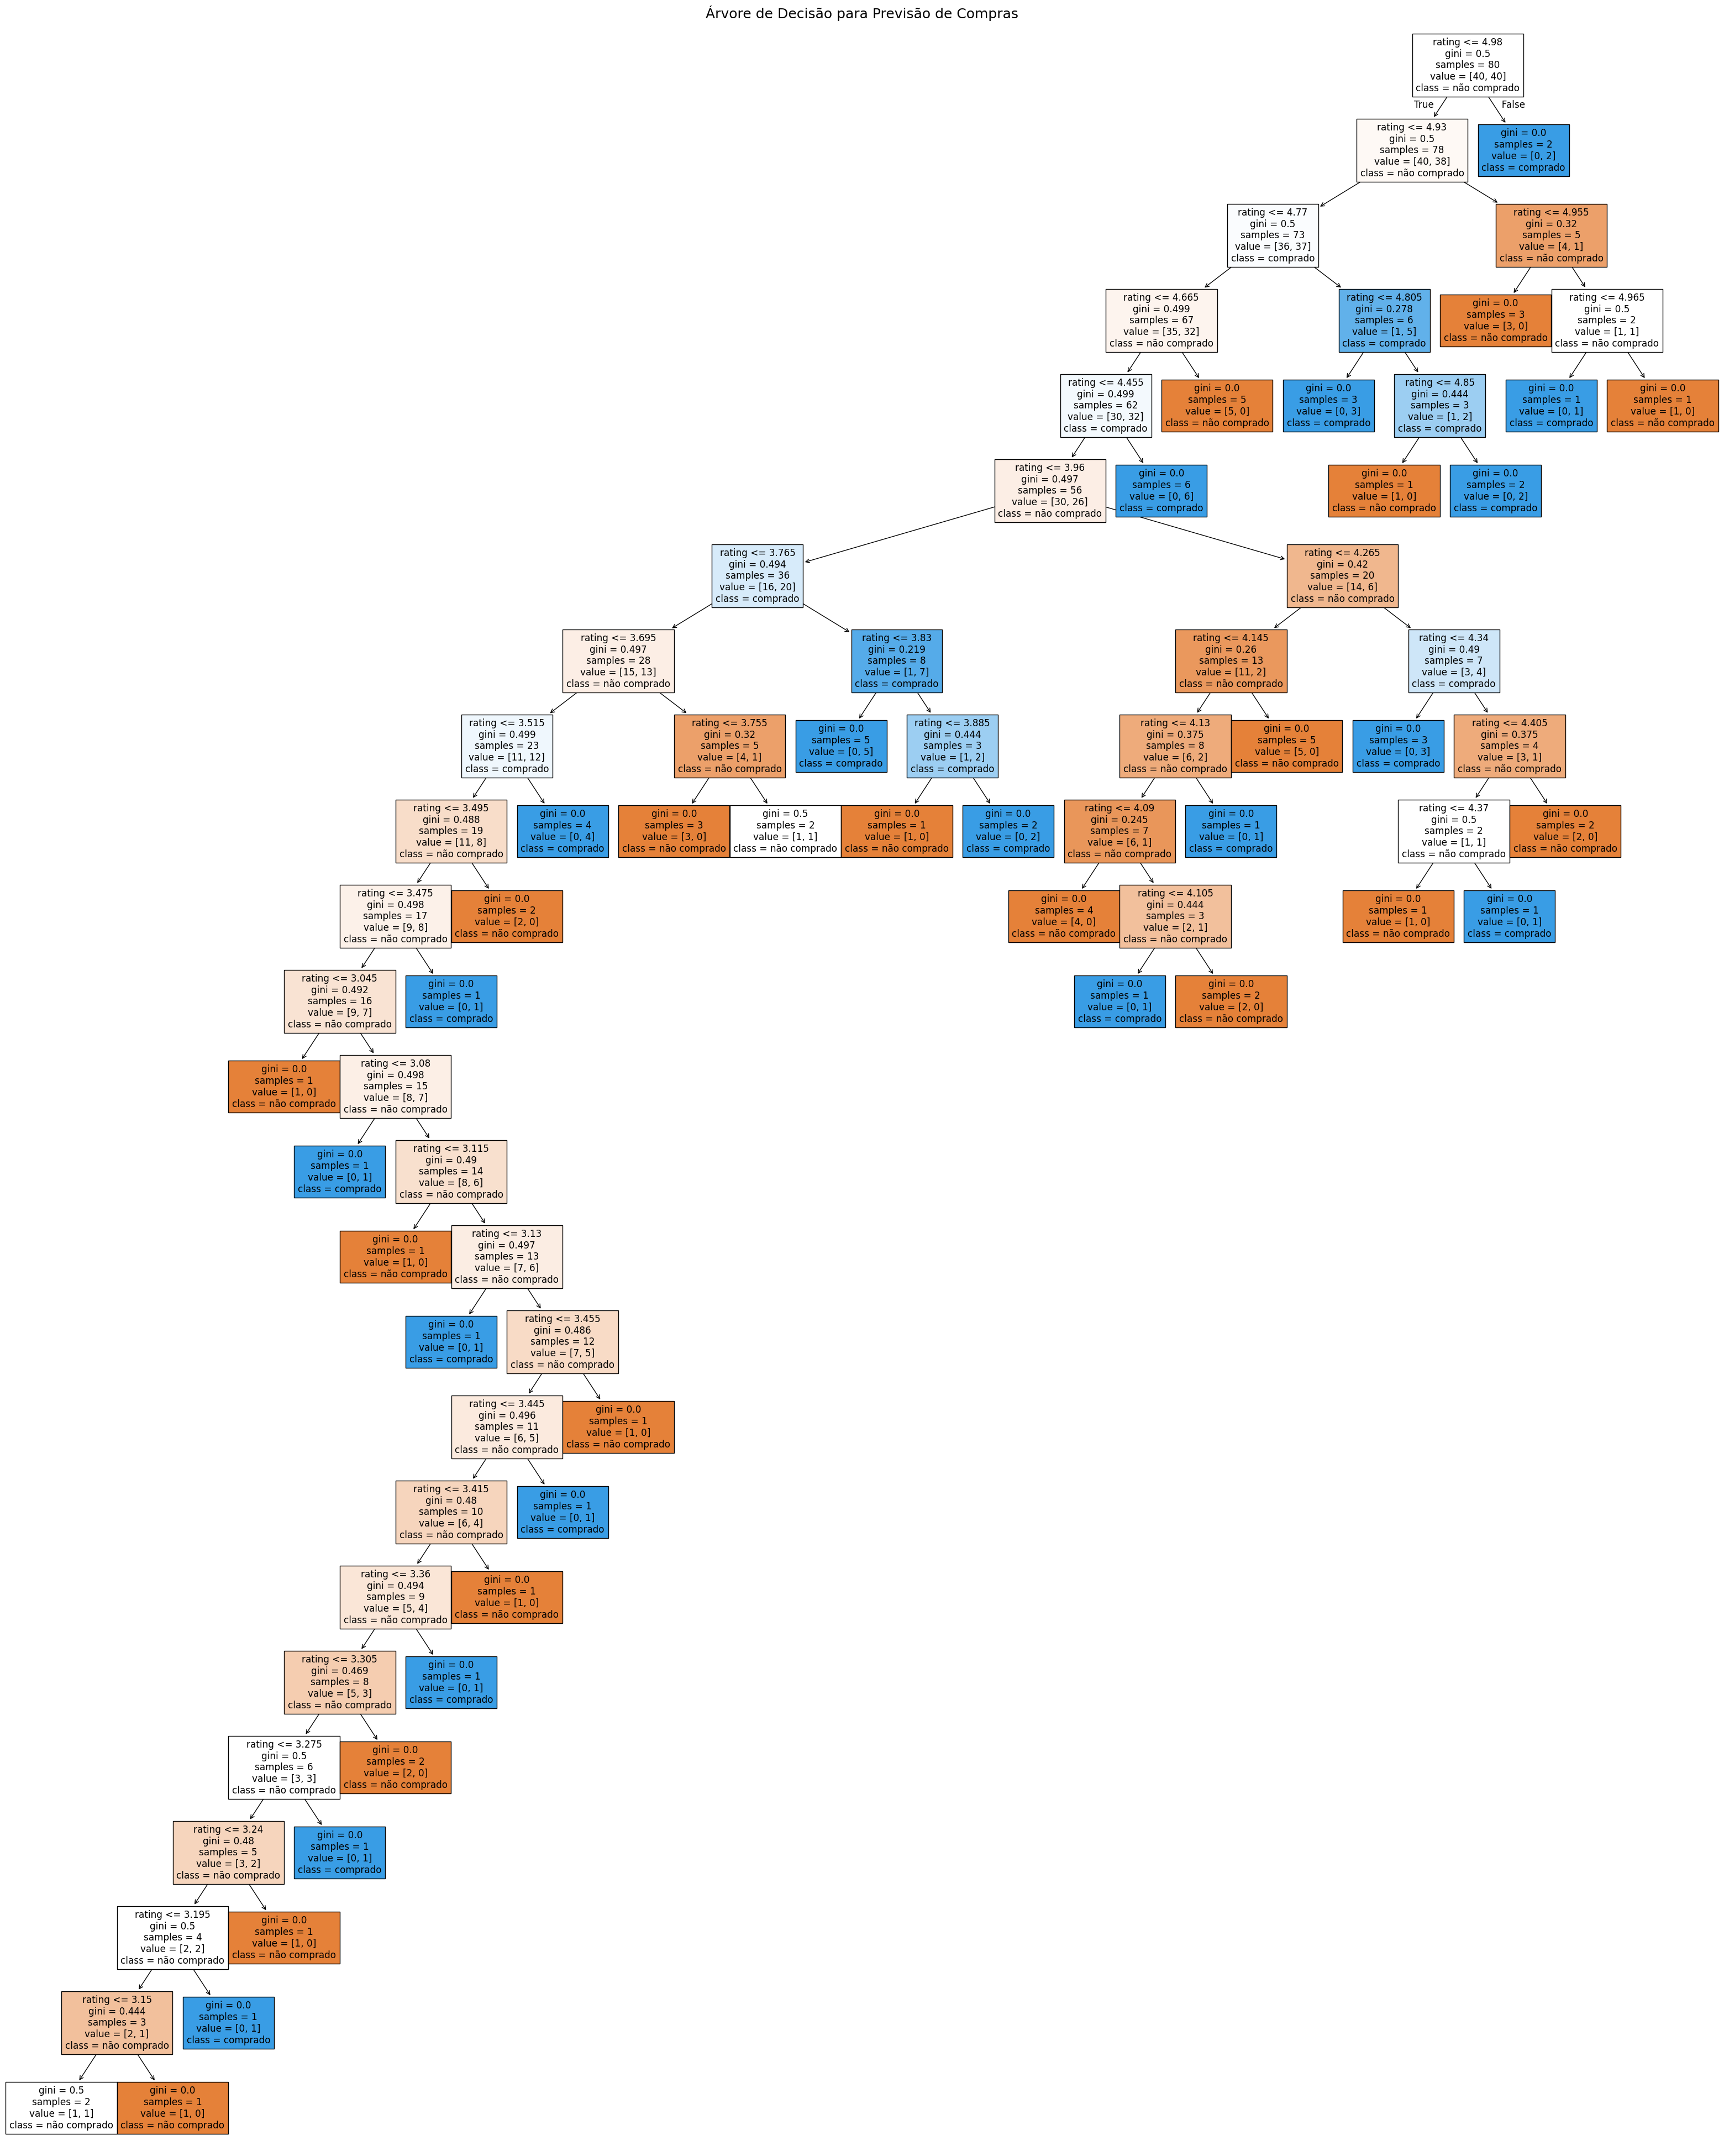

In [179]:
# 9. Visualização da árvore de decisão
plt.figure(figsize=(40, 50))
plot_tree(modelo, feature_names=['rating'], class_names=['não comprado', 'comprado'], filled=True)
plt.title('Árvore de Decisão para Previsão de Compras', fontsize=18)
plt.show()

In [180]:
# Filtrando produtos únicos
produtos_unicos = df['product_name'].unique()

# Treinando modelos para cada produto
modelos = {}
resultados = {}

In [183]:
for produto in produtos_unicos:
    # Filtrando dados para o produto atual
    df_produto = df[df['product_name'] == produto]
    
    # Definindo variáveis de entrada (X) e saída (y)
    X = df_produto[['rating']]
    y = df_produto['purchased']
    
    # Dividindo os dados (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Criando e treinando o modelo de árvore de decisão
    modelo = DecisionTreeClassifier()
    modelo.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = modelo.predict(X_test)
    
    # Calculando métricas
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Armazenando o modelo e resultados
    modelos[produto] = modelo
    resultados[produto] = {
        'Acuracia': acuracia,
        'Precisão': precisao,
        'Recall': recall,
        'F1-Score': f1,
        'Matriz de Confusão': confusion_matrix(y_test, y_pred),
        'Relatório': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Exibindo resultados para o produto atual
    print(f"Resultados para {produto}:")
    print(f"Acurácia: {acuracia:.2f}")
    print(f"Precisão: {precisao:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Matriz de Confusão:")
    print(resultados[produto]['Matriz de Confusão'])
    print("\n" + "="*50 + "\n")

Resultados para Televisão:
Acurácia: 0.25
Precisão: 0.50
Recall: 0.33
F1-Score: 0.40
Matriz de Confusão:
[[0 1]
 [2 1]]


Resultados para Celular:
Acurácia: 0.80
Precisão: 0.67
Recall: 1.00
F1-Score: 0.80
Matriz de Confusão:
[[2 1]
 [0 2]]


Resultados para Cafeteira:
Acurácia: 0.50
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00
Matriz de Confusão:
[[1 0]
 [1 0]]


Resultados para Videogame:
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00
Matriz de Confusão:
[[4]]


Resultados para iPod:
Acurácia: 0.50
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00
Matriz de Confusão:
[[2 0]
 [2 0]]


Resultados para Notebook:
Acurácia: 0.50
Precisão: 0.33
Recall: 1.00
F1-Score: 0.50
Matriz de Confusão:
[[1 2]
 [0 1]]




c:\Users\dsadm\Desktop\Formativa_IA-e-BigData\Formativa_IA-e-BigData\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dsadm\Desktop\Formativa_IA-e-BigData\Formativa_IA-e-BigData\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dsadm\Desktop\Formativa_IA-e-BigData\Formativa_IA-e-BigData\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

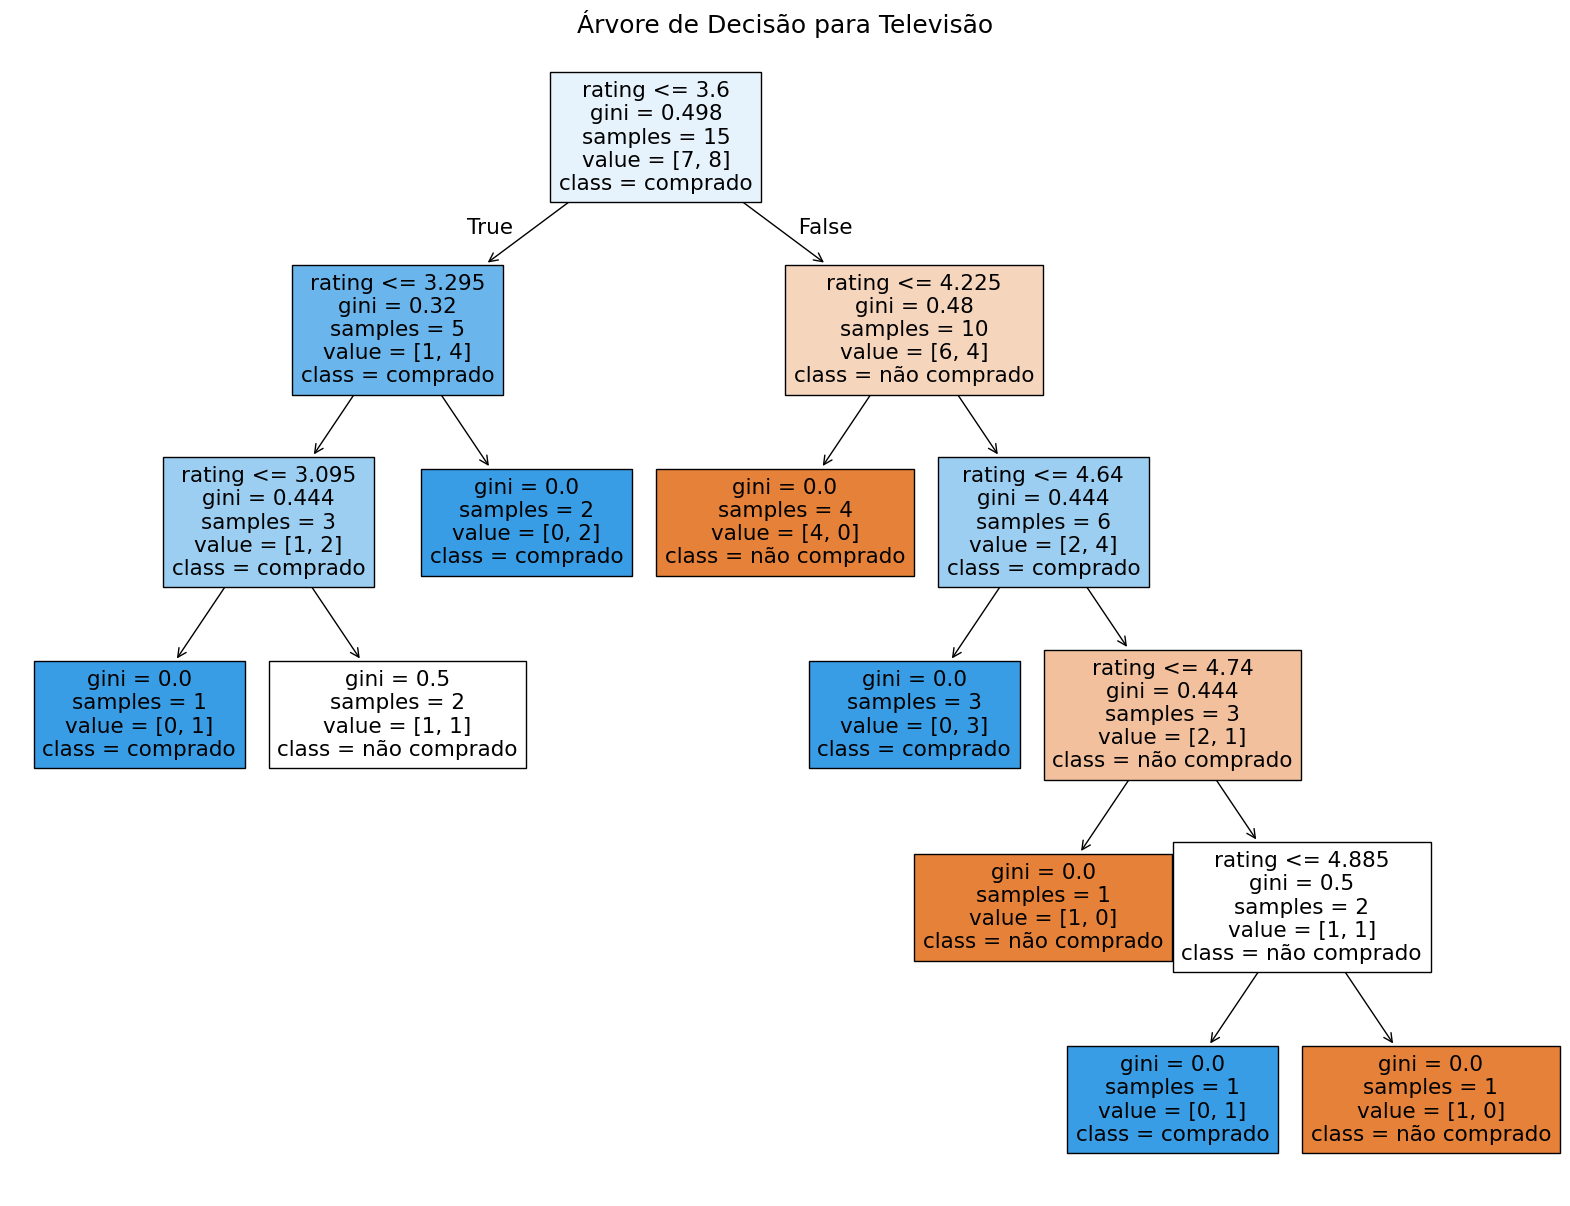

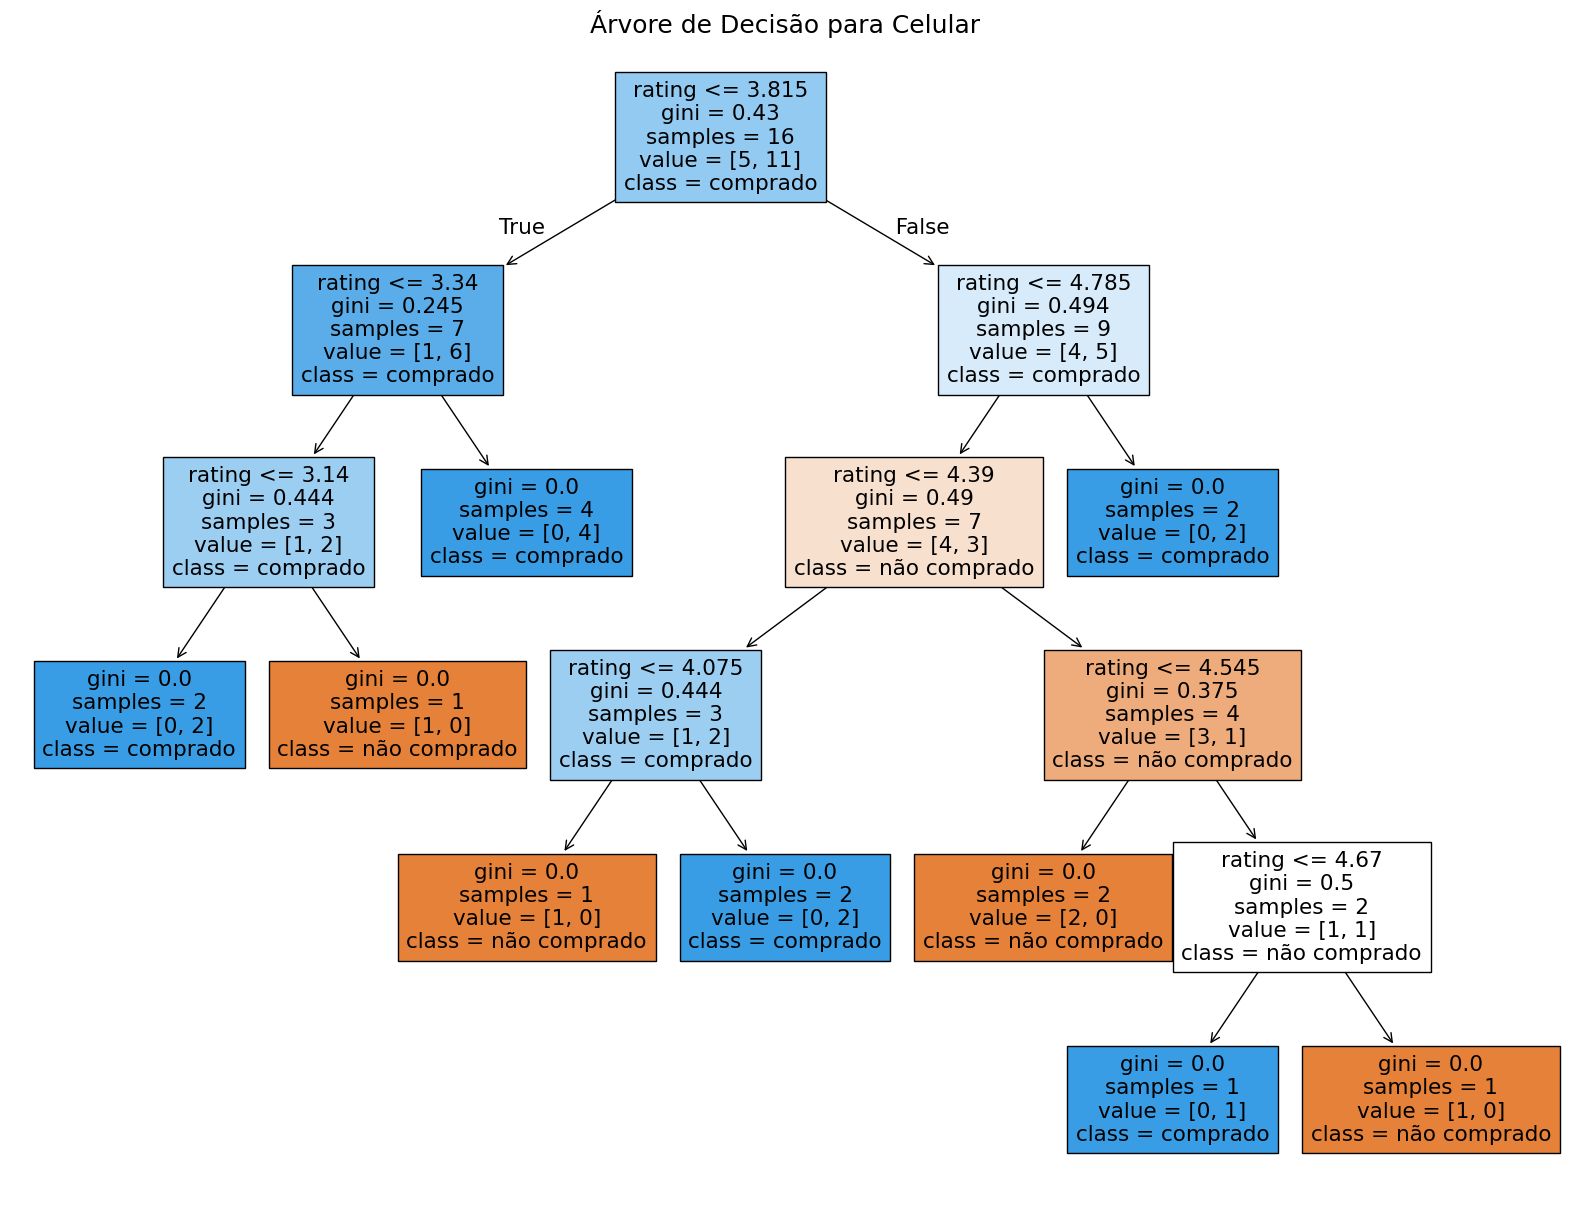

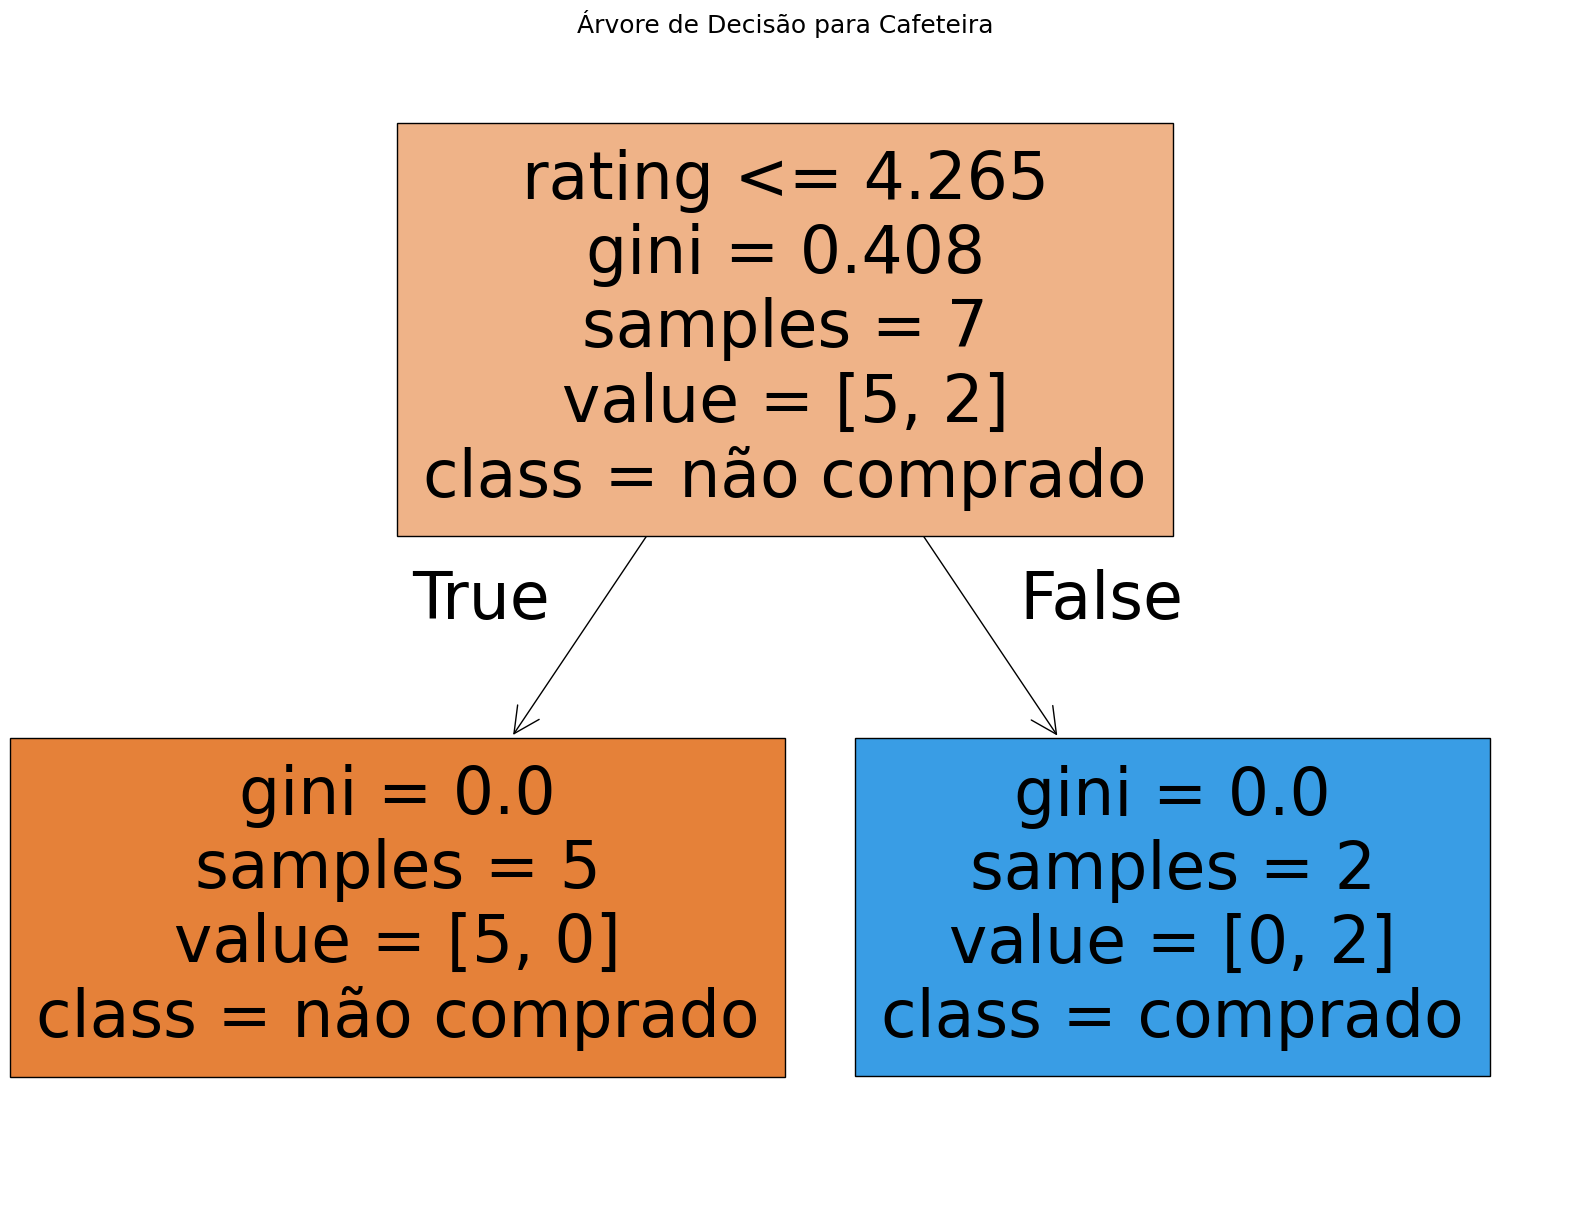

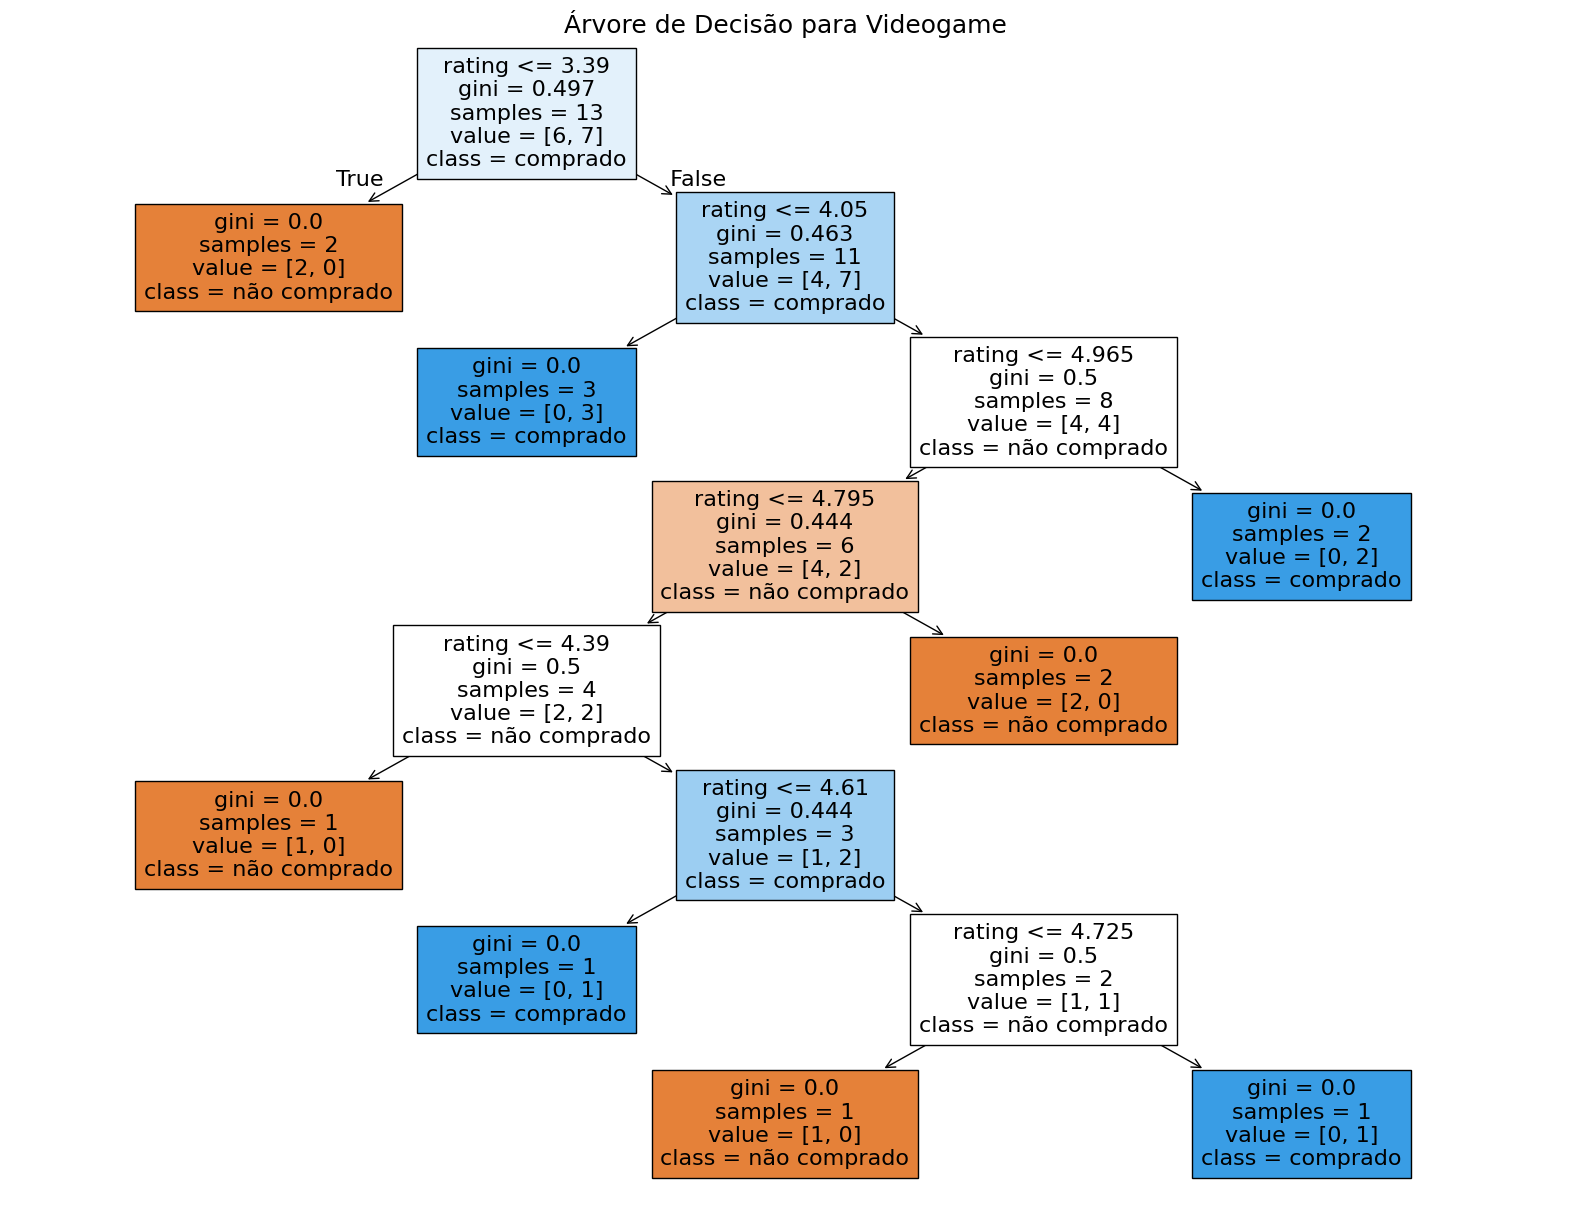

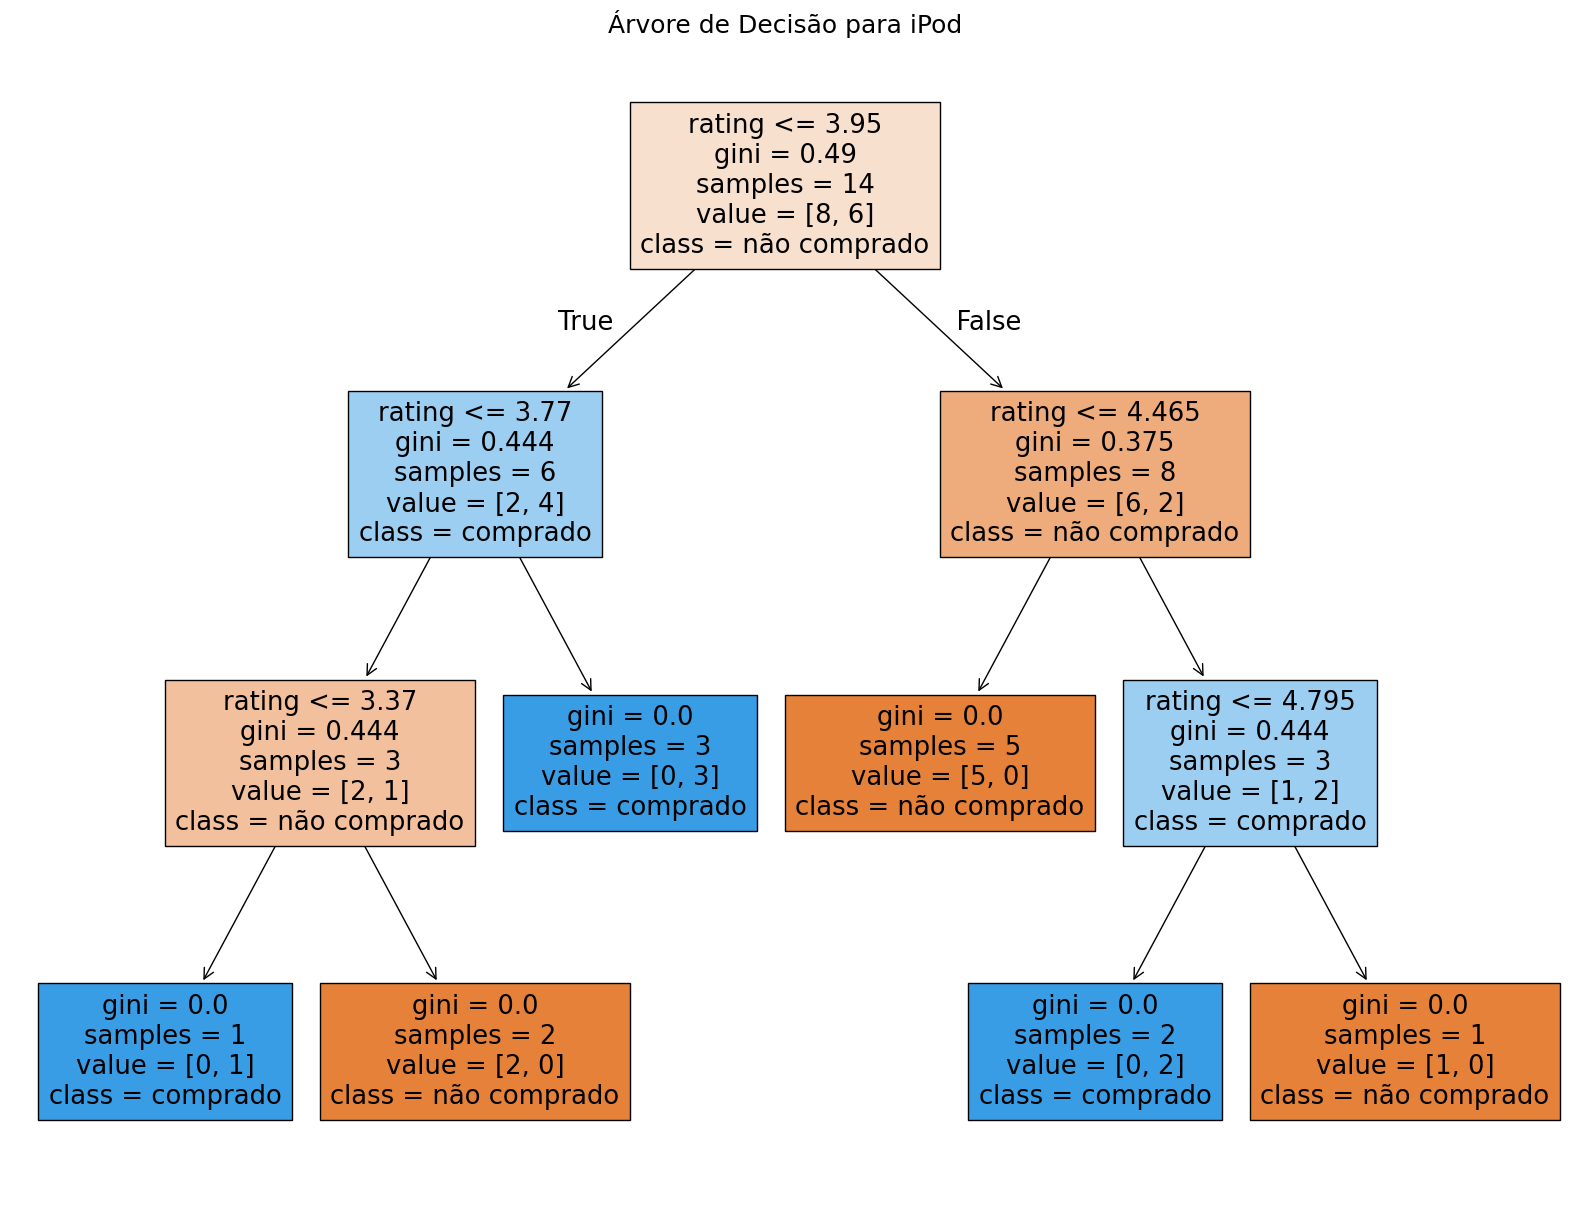

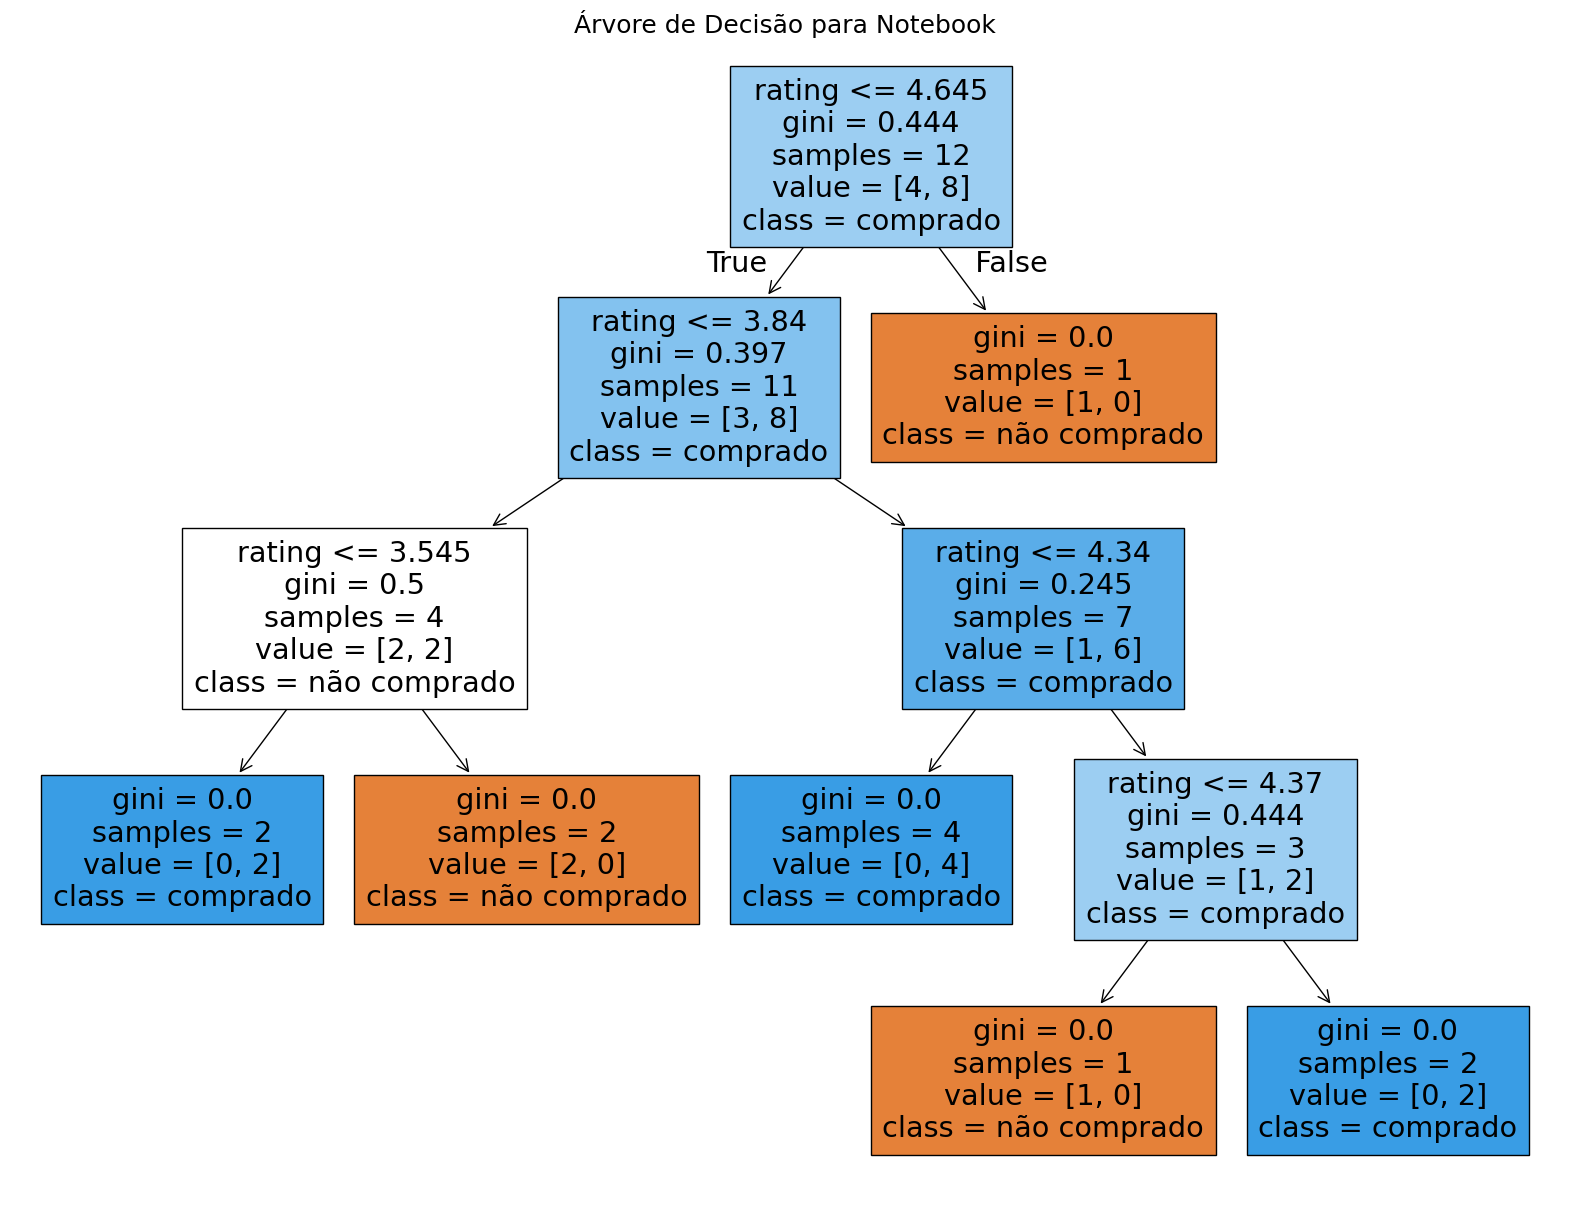

In [186]:
# 4. Visualização das árvores de decisão para todos os produtos
for produto, modelo in modelos.items():
    plt.figure(figsize=(20, 15))
    plot_tree(modelo, feature_names=['rating'], class_names=['não comprado', 'comprado'], filled=True)
    plt.title(f'Árvore de Decisão para {produto}', fontsize=18)
    plt.show()